In [23]:
import galah
import matplotlib
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely
from shapely.ops import unary_union, linemerge, split
from shapely.geometry import Point

In [24]:
galah.search_taxa(taxa="Dromaius novaehollandiae")

scientificName scientificNameAuthorship  \
0  Dromaius novaehollandiae           (Latham, 1790)   

                                      taxonConceptID     rank   kingdom  \
0  https://biodiversity.org.au/afd/taxa/2a4e373b-...  species  Animalia   

     phylum             order       family     genus  \
0  Chordata  Struthioniformes  Casuariidae  Dromaius   

                    species vernacularName   issues  
0  Dromaius novaehollandiae            Emu  noIssue

In [25]:
galah.galah_config(data_profile="ALA")
galah.atlas_counts(taxa="Dromaius novaehollandiae",use_data_profile=True)

totalRecords
0         98171

In [52]:
galah.galah_config(email="callumwaite2000@gmail.com")

In [27]:
galah.atlas_counts(taxa="Dromaius novaehollandiae",use_data_profile=True,group_by="basisOfRecord",expand=False)

basisOfRecord  count
0    HUMAN_OBSERVATION  90122
1  MACHINE_OBSERVATION     67
2    MATERIAL_CITATION      6
3      MATERIAL_SAMPLE     22
4          OBSERVATION   4913
5           OCCURRENCE   2227
6   PRESERVED_SPECIMEN    814

In [28]:
galah.atlas_counts(taxa="Dromaius novaehollandiae",use_data_profile=True,filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"],group_by="year",expand=False)

year  count
0   1970     81
1   1971     50
2   1972     47
3   1973     56
4   1974     74
5   1975    112
6   1976    181
7   1977    776
8   1978   1049
9   1979    790
10  1980   1081
11  1981    733
12  1982    222
13  1983    158
14  1984    190
15  1985    303
16  1986    230
17  1987    256
18  1988    294
19  1989    319
20  1990    411
21  1991    557
22  1992    564
23  1993    521
24  1994    573
25  1995    667
26  1996    717
27  1997    636
28  1998    938
29  1999   2627
30  2000   2521
31  2001   3050
32  2002   1782
33  2003   1309
34  2004   1150
35  2005   1271
36  2006   1325
37  2007   1430
38  2008   1394
39  2009   1636
40  2010   1462
41  2011   1947
42  2012   2611
43  2013   2692
44  2014   2917
45  2015   3070
46  2016   4227
47  2017   4959
48  2018   4970
49  2019   5496
50  2020   3522
51  2021   4508
52  2022   7007
53  2023   2116
54  2024     70

In [29]:
galah.atlas_counts(taxa="Dromaius novaehollandiae",use_data_profile=True,filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"])

totalRecords
0         83655

In [30]:
galah.atlas_counts(
    taxa="Dromaius novaehollandiae",
    use_data_profile=True,
    filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"],
    group_by="dataResourceName",
    expand=False
)

dataResourceName  count
0                                     eBird Australia  34295
1                         BirdLife Australia, Birdata  15347
2                                            SA Fauna  12000
3                                    NSW BioNet Atlas  11995
4                                    First Bird Atlas   3316
5                               iNaturalist Australia   2768
6          Western Australia Bird Surveys (1987-2015)   1038
7                                    Fauna Atlas N.T.    984
8                  WildNet - Queensland Wildlife Data    875
9                         Earth Guardians Weekly Feed    423
10                              Historical Bird Atlas    283
11                  ALA species sightings and OzAtlas    115
12           Eyre Peninsula's Bird Monitoring Program    107
13                                         NatureMapr     85
14                                        NatureShare     10
15  Tracking Australia - arid wildlife track-based...      8
16                       Northern Territory WildWatch      3
17                    NSW Bird Atlassers - Field Data      2
18                  Nature of Eyre Peninsula BioBlitz      1

In [155]:
data_provider_counts = galah.atlas_counts(
    taxa="Dromaius novaehollandiae",
    use_data_profile=True,
    filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"],
    group_by="dataResourceName",
    expand=False
)
data_provider_counts

dataResourceName  count
0                                     eBird Australia  34295
1                         BirdLife Australia, Birdata  15347
2                                            SA Fauna  12001
3                                    NSW BioNet Atlas  11996
4                                    First Bird Atlas   3316
5                               iNaturalist Australia   2767
6          Western Australia Bird Surveys (1987-2015)   1038
7                                    Fauna Atlas N.T.    984
8                  WildNet - Queensland Wildlife Data    875
9                         Earth Guardians Weekly Feed    423
10                              Historical Bird Atlas    283
11                  ALA species sightings and OzAtlas    115
12           Eyre Peninsula's Bird Monitoring Program    107
13                                         NatureMapr     85
14                                        NatureShare     10
15  Tracking Australia - arid wildlife track-based...      8
16                       Northern Territory WildWatch      3
17                    NSW Bird Atlassers - Field Data      2
18                  Nature of Eyre Peninsula BioBlitz      1

In [156]:
states_territories = gpd.read_file("Shapefiles/STE_2021_AUST_GDA2020/STE_2021_AUST_GDA2020.shp")
states_territories_main = states_territories[states_territories["STE_NAME21"] != "Other Territories"]
states_territories_main = states_territories_main.to_crs(4326)

In [157]:
occurrences = {data_provider_counts["dataResourceName"][i]: None for i in range(10)}
for i in range(10):
    occurrences[data_provider_counts["dataResourceName"][i]] = galah.atlas_occurrences(
            taxa="Dromaius novaehollandiae",
            use_data_profile=True,
            filters=["basisOfRecord=HUMAN_OBSERVATION", 
                     "year>=1970", 
                     "dataResourceName={}".format(data_provider_counts["dataResourceName"][i])]
        )

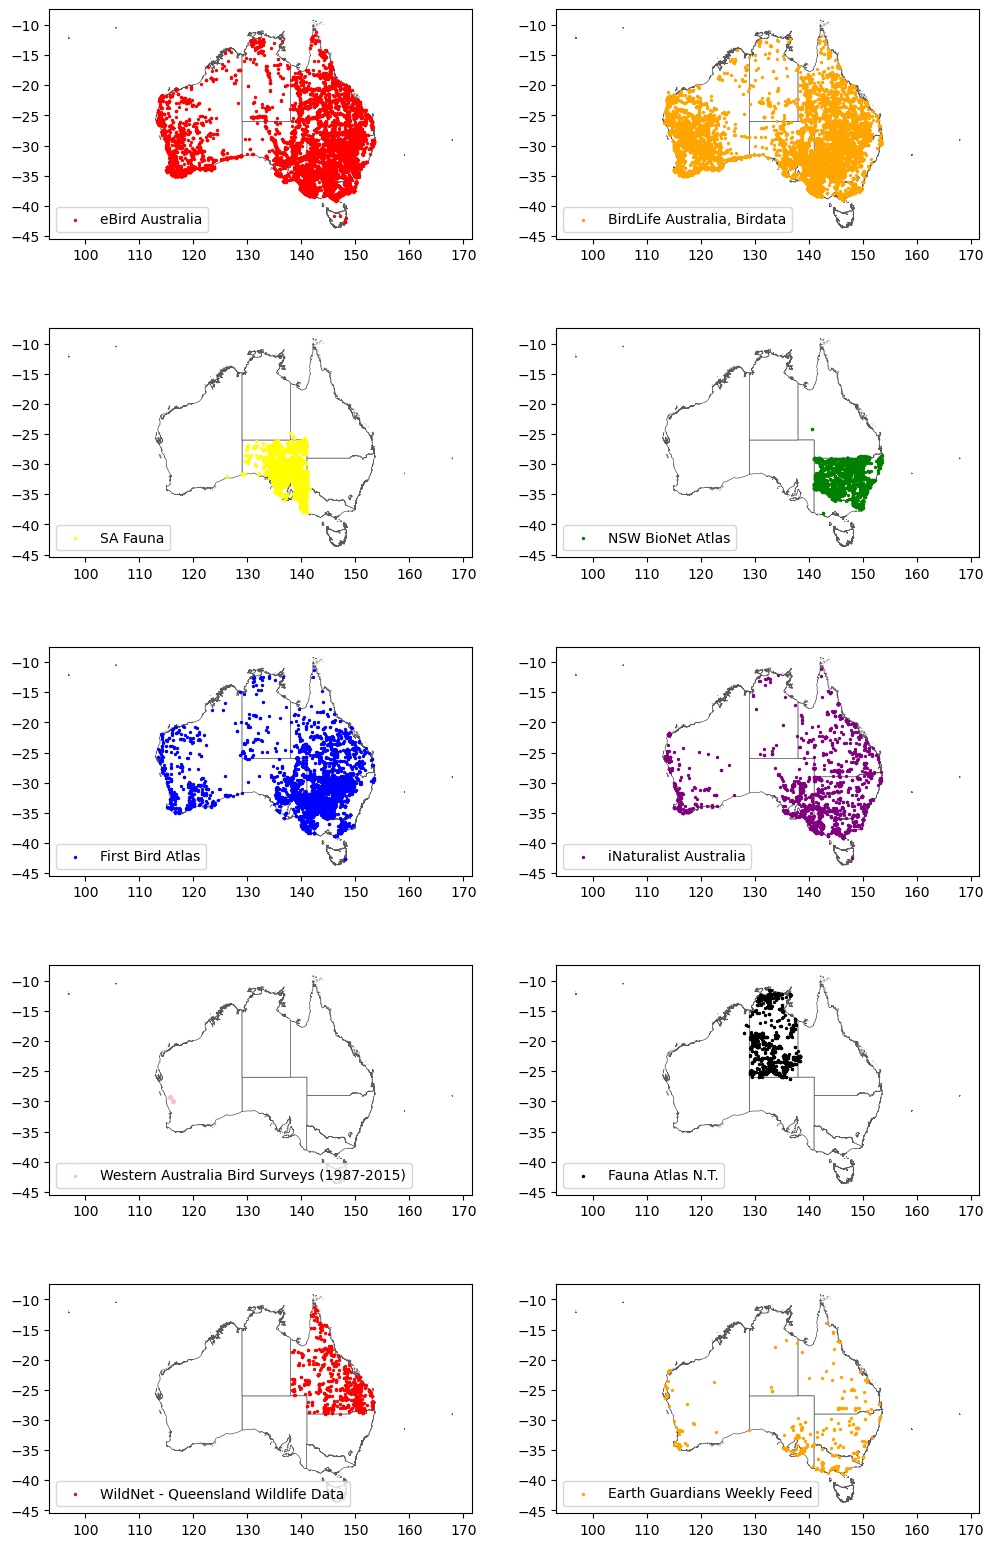

In [159]:
fig, axs = plt.subplots(5,2,figsize=(12,20))
index_for_occurrences = 0
colors = ["red","orange","gold","green","blue","purple","deeppink","black","seagreen","sienna"]
for i in range(5):
    for j in range(2):
        index_for_occurrences+=j
        states_territories.plot(ax = axs[i][j], edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
        axs[i][j].scatter(
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLongitude"],
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLatitude"],
            c = colors[index_for_occurrences], 
            s=2,
            label=data_provider_counts["dataResourceName"][index_for_occurrences]
        )
        axs[i][j].legend(loc="lower left")
    index_for_occurrences+=1
#plt.legend()

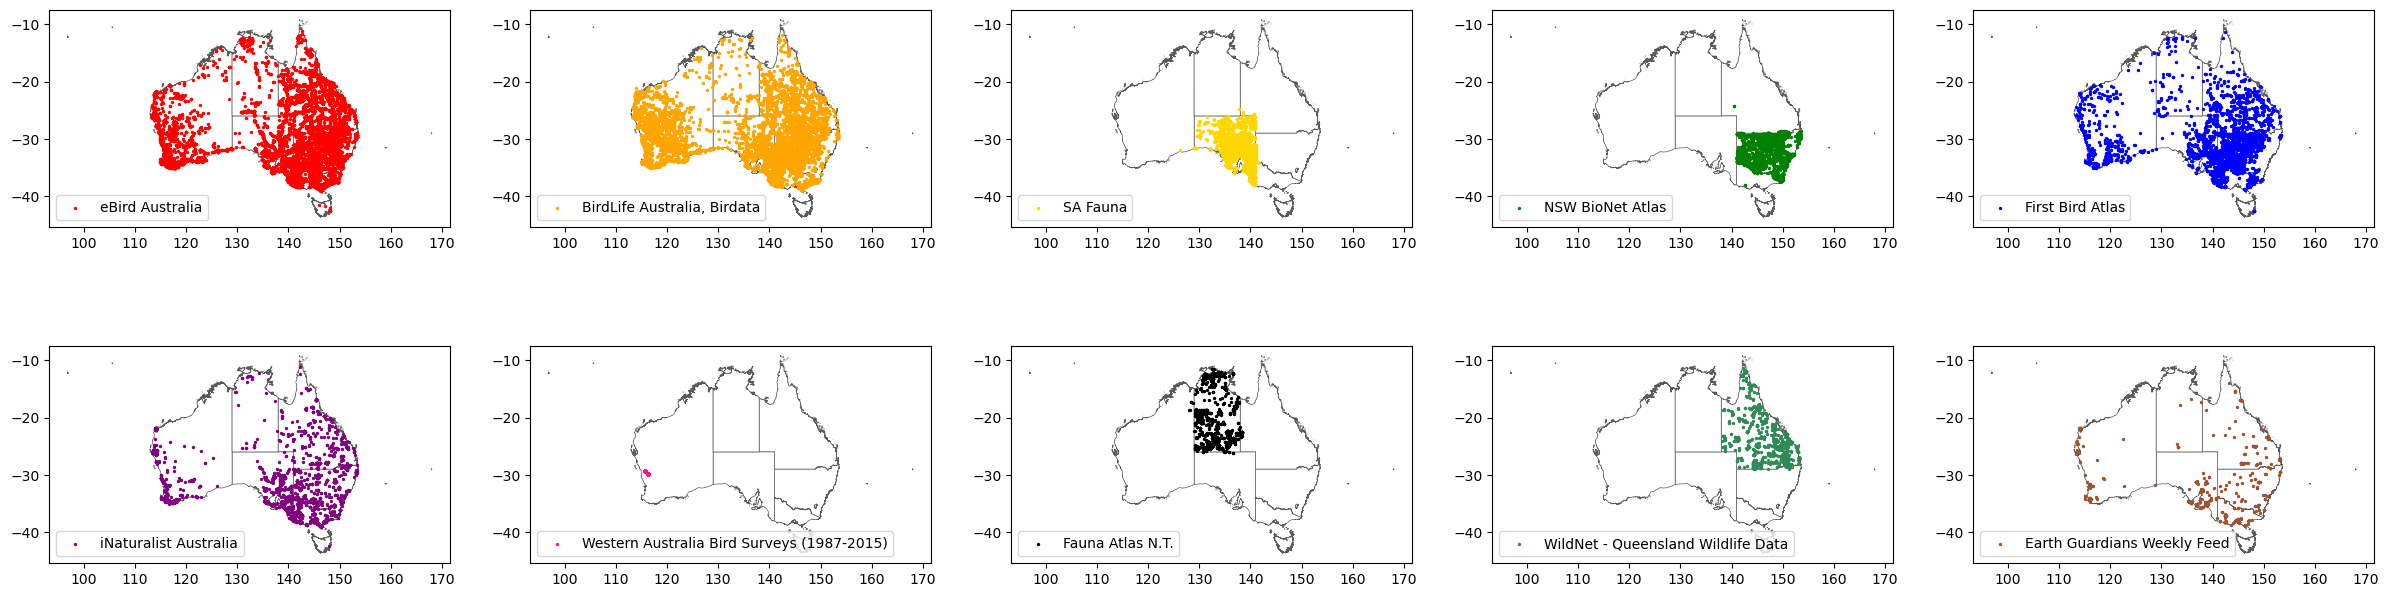

In [175]:
fig, axs = plt.subplots(2,5,figsize=(30,8))
index_for_occurrences = 0
colors = ["red","orange","gold","green","blue","purple","deeppink","black","seagreen","sienna"]
for i in range(2):
    for j in range(5):
        states_territories.plot(ax = axs[i][j], edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
        axs[i][j].scatter(
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLongitude"],
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLatitude"],
            c = colors[index_for_occurrences], 
            s=2,
            label=data_provider_counts["dataResourceName"][index_for_occurrences]
        )
        axs[i][j].legend(loc="lower left")
        index_for_occurrences+=1
plt.savefig("Emu_dataresourcename_map.png",dpi=600)

In [55]:
emu_occurrences_top_10 = pd.concat([occurrences[key] for key in occurrences])
emu_occurrences_top_10.columns

Index(['decimalLatitude', 'decimalLongitude', 'eventDate', 'scientificName',
       'taxonConceptID', 'recordID', 'dataResourceName', 'occurrenceStatus'],
      dtype='object')

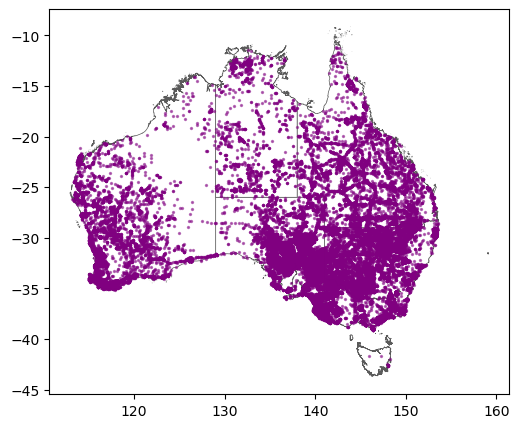

In [165]:
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(
    emu_occurrences_top_10["decimalLongitude"],
    emu_occurrences_top_10["decimalLatitude"],
    c = "purple", 
    s=2,
    alpha = 0.5
)
plt.savefig("Emu_map_Aus.png",dpi=600)

In [ ]:
## Occurrences Australia wide vs all species vs birds

In [58]:
emu_AUS = galah.atlas_counts(
    taxa="Dromaius novaehollandiae",
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970",
    ],
    group_by=["year"],expand=False).rename(columns={"count": "Emu"})

In [63]:
all_species_AUS = galah.atlas_counts(
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970",
    ],
    group_by=["year"],expand=False).rename(columns={"count": "All Species"})

In [62]:
birds_AUS = galah.atlas_counts(
    taxa = "Aves",
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970",
    ],
    group_by=["year"],expand=False).rename(columns={"count": "Birds"})

In [64]:
counts_year = all_species_AUS.merge(birds_AUS, on="year", how="left").merge(emu_AUS, on="year", how="left").fillna(0)
counts_year.head()

year  All Species  Birds  Emu
0  1970       172845  53100   81
1  1971        77289  59259   50
2  1972        68054  43640   47
3  1973        74804  41449   56
4  1974        69984  47142   74

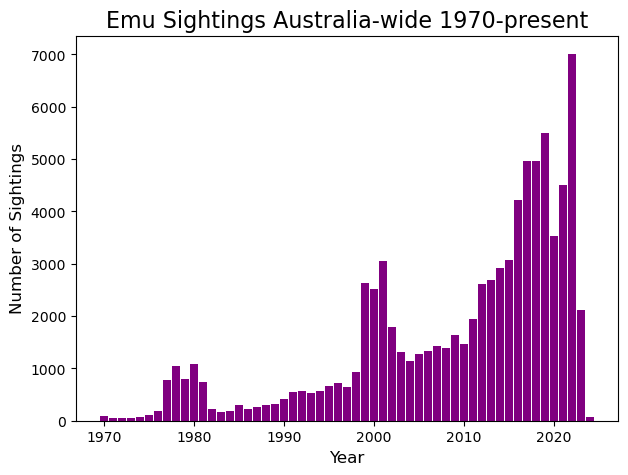

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.bar(counts_year["year"], counts_year["Emu"],color = "purple") # alpha = 0.5
plt.title("Emu Sightings Australia-wide 1970-present",fontsize=16)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of Sightings",fontsize=12)
plt.savefig("emu_sightings.png",dpi=300)
plt.savefig("Emu_by_year_Aus.png",dpi=600)

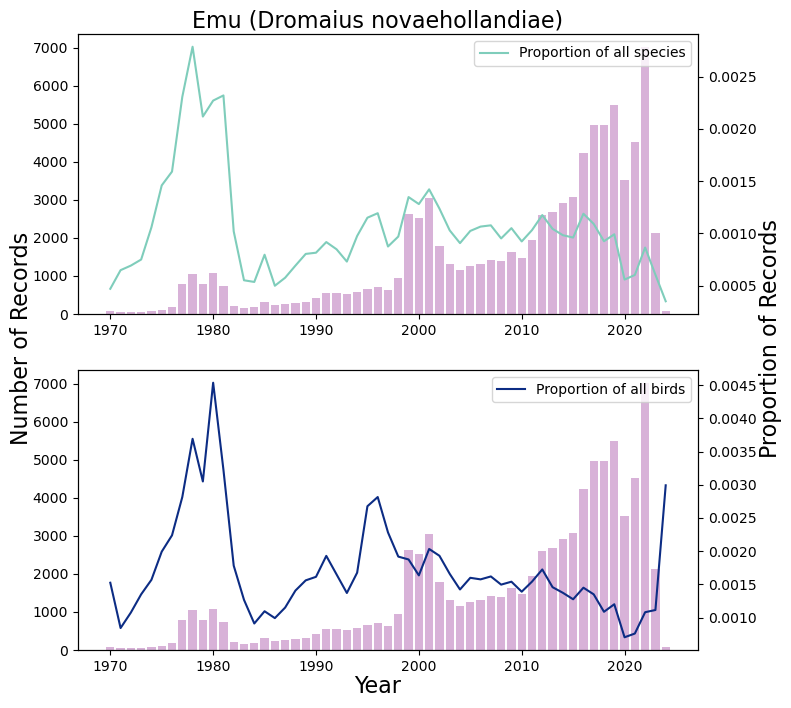

In [167]:
counts_year["Proportion of total counts all"] = counts_year["Emu"] / counts_year["All Species"]
counts_year["Proportion of total counts birds"] = counts_year["Emu"] / counts_year["Birds"]
counts_year.head()

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax2 = ax[0].twinx()
ax[0].bar(counts_year["year"], counts_year["Emu"], color = "purple", alpha=0.3)
ax2.plot(counts_year["year"], counts_year["Proportion of total counts all"], color="#7fcdbb", label="Proportion of all species")
ax2.legend()

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_year["year"], counts_year["Emu"], color = "purple", alpha=0.3)
ax3.plot(counts_year["year"], counts_year["Proportion of total counts birds"], color="#0c2c84", label="Proportion of all birds")
ax3.legend()

# add title
fig.suptitle("Emu (Dromaius novaehollandiae)",size=16,y=0.91)
fig.supxlabel("Year",size=16,y=0.05)
fig.supylabel("Number of Records",size=16,x=0.04)
fig.text(x=0.99, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')
plt.savefig("Emu_Proportions_AUS_vertical.png",dpi=300)

In [ ]:
# RABBIT FENCE

In [70]:
states_territories = gpd.read_file("Shapefiles/STE_2021_AUST_GDA2020/STE_2021_AUST_GDA2020.shp")
states_territories_main = states_territories[states_territories["STE_NAME21"] != "Other Territories"]
states_territories_main = states_territories_main.to_crs(4326)

WA = states_territories[states_territories["STE_NAME21"] == "Western Australia"]

rabbit_fence = gpd.read_file("Shapefiles/WA Rabbit Fence/Historic_Number_1_Rabbit_Proof_Fence_DPIRD_046.shp").to_crs(4326)

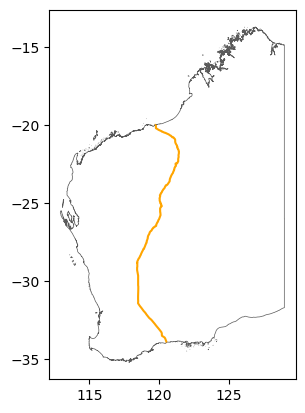

In [168]:
fig , ax = plt.subplots(1,1)
WA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
rabbit_fence.plot(ax = ax, edgecolor = "orange")
plt.savefig("Emu_Fence_WA_map.png",dpi=600)

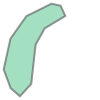

In [73]:
WA_shapely = shapely.ops.unary_union(WA.geometry)
rabbit_fence_shapely = shapely.ops.unary_union(rabbit_fence.geometry)
WA_split_shapely = split(WA_shapely, rabbit_fence_shapely)

In [110]:
shape_areas = pd.DataFrame({"row": [], "area": []})
for x in range(len(WA_split_shapely.geoms)):
    shape_areas = pd.concat([shape_areas, pd.DataFrame({"row": [x], "area": [WA_split_shapely.geoms[x].area]})])

In [112]:
shape_areas.sort_values(by =["area"], ascending=False).head()

row        area
0   705.0  154.251182
0   704.0   73.106262
0   138.0    0.056647
0   461.0    0.020355
0  1793.0    0.016226

In [139]:
WA_W = WA_split_shapely.geoms[704]
WA_W

In [140]:
WA_E = WA_split_shapely.geoms[705]
WA_E

In [141]:
emu_WA_E = galah.atlas_counts(taxa="Dromaius novaehollandiae", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by = ["year"], polygon = WA_E, expand=False).rename(columns={"count": "Emu E"})
emu_WA_W = galah.atlas_counts(taxa="Dromaius novaehollandiae", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by = ["year"], polygon = WA_W, expand=False).rename(columns={"count": "Emu W"})
emu_WA_all = galah.atlas_counts(taxa="Dromaius novaehollandiae", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=Western Australia"], group_by = ["year"], expand=False).rename(columns={"count": "Emu"})
all_species_WA_E = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by = ["year"], polygon = WA_E, expand=False).rename(columns={"count": "All Species E"})
all_species_WA_W = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by = ["year"], polygon = WA_W, expand=False).rename(columns={"count": "All Species W"})
all_species_WA_all = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=Western Australia"], group_by = ["year"], expand=False).rename(columns={"count": "All Species"})
birds_WA_E = galah.atlas_counts(taxa="Aves", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by = ["year"], polygon = WA_E, expand=False).rename(columns={"count": "Birds E"})
birds_WA_W = galah.atlas_counts(taxa="Aves", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by = ["year"], polygon = WA_W, expand=False).rename(columns={"count": "Birds W"})
birds_WA_all = galah.atlas_counts(taxa="Aves", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=Western Australia"], group_by = ["year"], expand=False).rename(columns={"count": "Birds"})

In [142]:
counts_WA_year_all = all_species_WA_all.merge(birds_WA_all, on="year", how="left").merge(emu_WA_all, on="year", how="left").fillna(0)
counts_WA_year_E = all_species_WA_E.merge(birds_WA_E, on="year", how="left").merge(emu_WA_E, on="year", how="left").fillna(0)
counts_WA_year_W = all_species_WA_W.merge(birds_WA_W, on="year", how="left").merge(emu_WA_W, on="year", how="left").fillna(0)
counts_WA_year_EW = counts_WA_year_all.merge(counts_WA_year_E, on="year", how="left").merge(counts_WA_year_W, on="year", how="left").fillna(0)
counts_WA_year_EW.head()

year  All Species  Birds  Emu  All Species E  Birds E  Emu E  \
0  1970         1406    425    2            981      231    0.0   
1  1971          727    341    3            111       71    0.0   
2  1972          848    837   13            203      196    4.0   
3  1973         1236    937    2            457      345    1.0   
4  1974          627    381    3            304       72    0.0   

   All Species W  Birds W  Emu W  
0            445      211      2  
1            618      268      3  
2            659      640      9  
3            788      604      1  
4            342      327      3

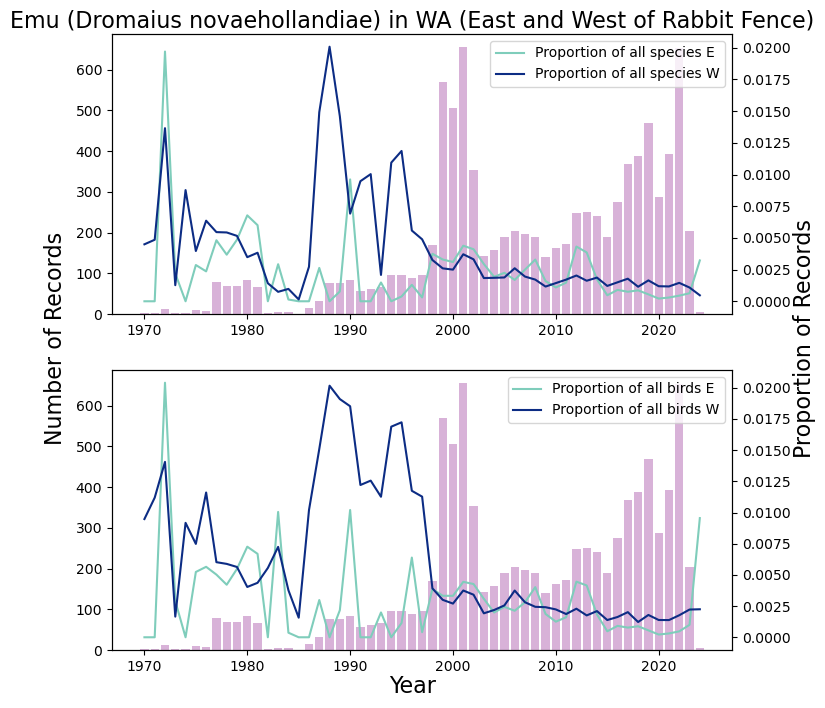

In [173]:
counts_WA_year_EW["WA proportion of total counts all E"] = counts_WA_year_EW["Emu E"] / counts_WA_year_EW["All Species E"]
counts_WA_year_EW["WA proportion of total counts all W"] = counts_WA_year_EW["Emu W"] / counts_WA_year_EW["All Species W"]
counts_WA_year_EW["WA proportion of total counts birds E"] = counts_WA_year_EW["Emu E"] / counts_WA_year_EW["Birds E"]
counts_WA_year_EW["WA proportion of total counts birds W"] = counts_WA_year_EW["Emu W"] / counts_WA_year_EW["Birds W"]

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax2 = ax[0].twinx()
ax[0].bar(counts_WA_year_EW["year"], counts_WA_year_EW["Emu"], color = "purple", alpha=0.3)
ax2.plot(counts_WA_year_EW["year"], counts_WA_year_EW["WA proportion of total counts all E"], color="#7fcdbb", label="Proportion of all species E")
ax2.plot(counts_WA_year_EW["year"], counts_WA_year_EW["WA proportion of total counts all W"], color="#0c2c84", label="Proportion of all species W")
ax2.legend()

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_WA_year_EW["year"], counts_WA_year_EW["Emu"], color = "purple", alpha=0.3)
ax3.plot(counts_WA_year_EW["year"], counts_WA_year_EW["WA proportion of total counts birds E"], color="#7fcdbb", label="Proportion of all birds E")
ax3.plot(counts_WA_year_EW["year"], counts_WA_year_EW["WA proportion of total counts birds W"], color="#0c2c84", label="Proportion of all birds W")
ax3.legend()

# add title
fig.suptitle("Emu (Dromaius novaehollandiae) in WA (East and West of Rabbit Fence)",size=16,y=0.91)
fig.supxlabel("Year",size=16,y=0.05)
fig.supylabel("Number of Records",size=16,x=0.04)
fig.text(x=0.99, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')
plt.savefig("Emu_rabbit_fence_proportions_WA_vertical.png",dpi=300)

In [144]:
emu_WA_occs = galah.atlas_occurrences(taxa="Dromaius novaehollandiae", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=Western Australia"])

In [145]:
geometry = [Point(xy) for xy in zip(emu_WA_occs.decimalLongitude, emu_WA_occs.decimalLatitude)]

In [146]:
emu_WA_occs = gpd.GeoDataFrame(emu_WA_occs, crs="EPSG:4326", geometry=geometry)
rabbit_fence_gdf = gpd.GeoDataFrame(index=[0, 1], crs='EPSG:4326', geometry=[WA_E, WA_W])

In [150]:
emu_SA_occs_EW = gpd.sjoin(rabbit_fence_gdf, emu_WA_occs, how = "right")
emu_SA_occs_EW["Side of Rabbit Fence"] = ['E' if a==0 else 'W' if a==1 else 'Island' for a in emu_SA_occs_EW['index_left']]
emu_SA_occs_EW["color"] = ['#7fcdbb' if a==0 else '#0c2c84' if a==1 else '#555555' for a in emu_SA_occs_EW['index_left']]

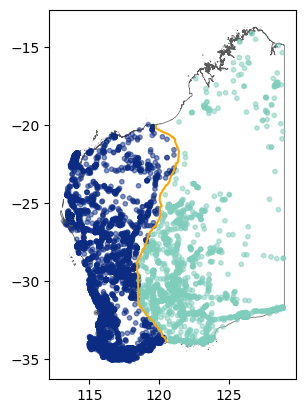

In [172]:
fig , ax = plt.subplots(1,1)
WA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(emu_SA_occs_EW["decimalLongitude"], emu_SA_occs_EW["decimalLatitude"], color = emu_SA_occs_EW["color"], alpha = 0.5, s=10)
rabbit_fence.plot(ax = ax, edgecolor = "orange")
plt.savefig("Emu_Fence_WA_map.png",dpi=600)

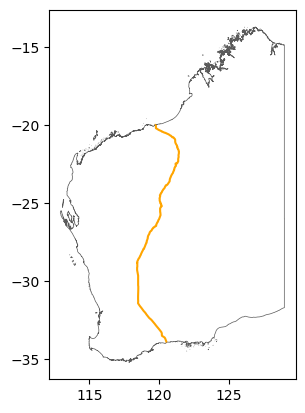

In [170]:
fig , ax = plt.subplots(1,1)
WA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
rabbit_fence.plot(ax = ax, edgecolor = "orange")
plt.savefig("Rabbit_Fence_WA_map.png",dpi=600)

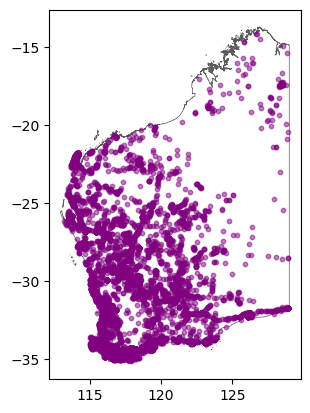

In [171]:
fig , ax = plt.subplots(1,1)
WA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(emu_SA_occs_EW["decimalLongitude"], emu_SA_occs_EW["decimalLatitude"], color = "purple", alpha = 0.5, s=10)
plt.savefig("Emu_WA_map.png",dpi=600)